# **EXPLORATORY DATA ANALYSIS**

# Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
import statsmodels.api as sm
import pylab
import scipy
from scipy.stats import kruskal
sns.set()

# Import Full Dataset

In [2]:
full_df = pd.read_csv('../input/asteroid-dataset/dataset.csv')
full_df.head()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3170: DtypeWarning: Columns (3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.40,939.400,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.20,545.000,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.33,246.596,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.00,525.400,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.90,106.699,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


# Take a 50000 Sample From The Full Dataset

In [3]:
df = full_df.sample(50000, random_state = 0).reset_index()
df.head()

,index,id,spkid,full_name,pdes,name,prefix,neo,pha,H,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,840267,bK15M66A,3722235,(2015 MA66),2015 MA66,NaN,NaN,N,N,19.487,...,0.000715,0.000096,0.002956,0.041253,1.608400e-04,2.232900e-05,0.104580,0.102990,MCA,0.44852
1,493247,a0493248,2493248,493248 (2014 UD99),493248,NaN,NaN,N,N,16.100,...,0.000007,0.000040,0.000163,0.000159,4.572600e-08,3.900200e-09,0.000888,0.000043,MBA,0.57734
2,93180,a0093181,2093181,93181 (2000 ST104),93181,NaN,NaN,N,N,15.600,...,0.000009,0.000022,0.000035,0.000024,1.811700e-08,2.086400e-09,0.000105,0.000014,MBA,0.56499
3,553332,bK01S76X,3203861,(2001 SX76),2001 SX76,NaN,NaN,N,N,19.100,...,0.000043,0.000082,0.000876,0.000450,1.773700e-08,2.842200e-09,0.001486,0.000011,MCA,0.66681
4,113153,a0113154,2113154,113154 (2002 RJ96),113154,NaN,NaN,N,N,15.500,...,0.000005,0.000265,0.000266,0.000031,2.016300e-08,1.960800e-09,0.000153,0.000017,MBA,0.58503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 46 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           50000 non-null  int64  
 1   id              50000 non-null  object 
 2   spkid           50000 non-null  int64  
 3   full_name       50000 non-null  object 
 4   pdes            50000 non-null  object 
 5   name            1167 non-null   object 
 6   prefix          0 non-null      object 
 7   neo             50000 non-null  object 
 8   pha             48953 non-null  object 
 9   H               49677 non-null  float64
 10  diameter        7102 non-null   float64
 11  albedo          7032 non-null   float64
 12  diameter_sigma  7094 non-null   float64
 13  orbit_id        50000 non-null  object 
 14  epoch           50000 non-null  float64
 15  epoch_mjd       50000 non-null  int64  
 16  epoch_cal       50000 non-null  float64
 17  equinox         50000 non-null 

# Reasons of Dropping Columns

### Highly Correlated

In [5]:
sigmas = ['sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w', 
          'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per']

df[sigmas].corr()

,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per
sigma_e,1.000000,0.579494,0.609452,0.881811,0.815863,0.255354,0.255527,0.567549,0.720380,0.257789,0.566542
sigma_a,0.579494,1.000000,0.726943,0.612316,0.314524,0.214862,0.215436,0.993533,0.071049,0.224402,0.999165
sigma_q,0.609452,0.726943,1.000000,0.736286,0.418967,0.505041,0.505866,0.656641,0.101272,0.515589,0.744741
sigma_i,0.881811,0.612316,0.736286,1.000000,0.849629,0.204108,0.204636,0.560147,0.628282,0.215332,0.614471
sigma_om,0.815863,0.314524,0.418967,0.849629,1.000000,0.221812,0.221837,0.277671,0.878456,0.230587,0.306646
sigma_w,0.255354,0.214862,0.505041,0.204108,0.221812,1.000000,0.999999,0.173638,0.007989,0.999575,0.224376
sigma_ma,0.255527,0.215436,0.505866,0.204636,0.221837,0.999999,1.000000,0.174140,0.007835,0.999584,0.224984
sigma_ad,0.567549,0.993533,0.656641,0.560147,0.277671,0.173638,0.174140,1.000000,0.071877,0.181377,0.988911
sigma_n,0.720380,0.071049,0.101272,0.628282,0.878456,0.007989,0.007835,0.071877,1.000000,0.008034,0.051904
sigma_tp,0.257789,0.224402,0.515589,0.215332,0.230587,0.999575,0.999584,0.181377,0.008034,1.000000,0.234412


Several column pairs like:
* sigma_w and sigma_ma
* sigma_a and sigma_per 
* etc.

They are highly correlated, so we can do some dimensionality reduction by dropping one of them. 

### All / Most Values are Missing

Columns like:
* name
* prefix
* diameter
* albedo
* diameter_sigma
* etc.

Have very large amount of missing values, so we can't use them in the next step of EDA up until modelling.

### Irrelevant

Several columns like:
* index
* id
* skipid
* full_name
* name
* prefix
* orbit_id
* pdes
* etc.

All of them don't give any useful information that can help us predict the hazardousness of asteroids, so we also drop this column.

In [6]:
columns_to_drop = ['index', 'id', 'spkid', 'full_name', 'name', 'prefix', 'orbit_id', 'diameter', 'equinox', 'albedo', 
                   'diameter_sigma', 'moid', 'sigma_e', 'sigma_a', 'sigma_q', 'sigma_om', 'tp_cal',
                   'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'pdes', 'epoch_mjd', 'epoch_cal']
df.drop(columns_to_drop, axis = 1, inplace = True)
df.head()

,neo,pha,H,epoch,e,a,q,i,om,w,...,ad,n,tp,per,per_y,moid_ld,sigma_i,sigma_w,class,rms
0,N,N,19.487,2459000.5,0.302488,2.317476,1.616467,8.616829,120.269614,151.286378,...,3.018484,0.279371,2.458461e+06,1288.609117,3.528019,235.966224,0.000715,0.002956,MCA,0.44852
1,N,N,16.100,2459000.5,0.019156,3.106360,3.046854,7.599659,224.086389,316.605492,...,3.165865,0.180022,2.459633e+06,1999.751520,5.475021,797.708991,0.000007,0.000163,MBA,0.57734
2,N,N,15.600,2459000.5,0.167680,2.608938,2.171471,13.473446,9.697766,67.936834,...,3.046404,0.233888,2.459715e+06,1539.196089,4.214089,476.818867,0.000009,0.000035,MBA,0.56499
3,N,N,19.100,2459000.5,0.288892,2.197469,1.562638,8.658255,185.816818,186.820179,...,2.832301,0.302566,2.459338e+06,1189.823817,3.257560,219.160307,0.000043,0.000876,MCA,0.66681
4,N,N,15.500,2459000.5,0.092806,2.866441,2.600417,1.076426,268.833672,67.476110,...,3.132465,0.203090,2.459492e+06,1772.608946,4.853139,619.161687,0.000005,0.000266,MBA,0.58503


In [7]:
df.shape

(50000, 21)

# Checking Number of Categorical and Numerical Columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   neo      50000 non-null  object 
 1   pha      48953 non-null  object 
 2   H        49677 non-null  float64
 3   epoch    50000 non-null  float64
 4   e        50000 non-null  float64
 5   a        50000 non-null  float64
 6   q        50000 non-null  float64
 7   i        50000 non-null  float64
 8   om       50000 non-null  float64
 9   w        50000 non-null  float64
 10  ma       50000 non-null  float64
 11  ad       50000 non-null  float64
 12  n        50000 non-null  float64
 13  tp       50000 non-null  float64
 14  per      50000 non-null  float64
 15  per_y    50000 non-null  float64
 16  moid_ld  49994 non-null  float64
 17  sigma_i  48953 non-null  float64
 18  sigma_w  48953 non-null  float64
 19  class    50000 non-null  object 
 20  rms      50000 non-null  float64
dtypes: float64(1

# Tidy Column Names

In [9]:
before_and_after = {'pha': 'potentially_hazardous', 'e': 'eccentricity', 'a': 'semi_major_axis', 
                    'q': 'perihelion_distance', 'i': 'inclination', 'neo': 'near_earth', 
                    'H': 'absolute_magnitude_parameter', 'pdes': 'primary_designation'}

df.rename(columns = before_and_after, inplace = True)
df.head()

,near_earth,potentially_hazardous,absolute_magnitude_parameter,epoch,eccentricity,semi_major_axis,perihelion_distance,inclination,om,w,...,ad,n,tp,per,per_y,moid_ld,sigma_i,sigma_w,class,rms
0,N,N,19.487,2459000.5,0.302488,2.317476,1.616467,8.616829,120.269614,151.286378,...,3.018484,0.279371,2.458461e+06,1288.609117,3.528019,235.966224,0.000715,0.002956,MCA,0.44852
1,N,N,16.100,2459000.5,0.019156,3.106360,3.046854,7.599659,224.086389,316.605492,...,3.165865,0.180022,2.459633e+06,1999.751520,5.475021,797.708991,0.000007,0.000163,MBA,0.57734
2,N,N,15.600,2459000.5,0.167680,2.608938,2.171471,13.473446,9.697766,67.936834,...,3.046404,0.233888,2.459715e+06,1539.196089,4.214089,476.818867,0.000009,0.000035,MBA,0.56499
3,N,N,19.100,2459000.5,0.288892,2.197469,1.562638,8.658255,185.816818,186.820179,...,2.832301,0.302566,2.459338e+06,1189.823817,3.257560,219.160307,0.000043,0.000876,MCA,0.66681
4,N,N,15.500,2459000.5,0.092806,2.866441,2.600417,1.076426,268.833672,67.476110,...,3.132465,0.203090,2.459492e+06,1772.608946,4.853139,619.161687,0.000005,0.000266,MBA,0.58503


# Split into Train and Test Dataset

**train** is the dataset that will be used in Exploratory Data Analysis and finding the best model. Meanwhile **test** is the unseen dataset that will be used to evaluate our final model performance. In this case we split the data into 80% training dataset and 20% testing dataset.

In [10]:
dataset_size = len(df)
dataset_size

50000

In [11]:
TRAIN = df.iloc[0: int(0.8 * dataset_size)]
TEST = df.iloc[int(0.8 * dataset_size) : dataset_size]

In [12]:
print(f'Train shape: {TRAIN.shape}')
print(f'Test shape: {TEST.shape}')

Train shape: (40000, 21)
Test shape: (10000, 21)


# Target Variable: potentially_hazardous

As stated in the problem statement, our objective is to predict the variable potentially_hazardous. There are 2 distinct values (excluding missing values that we are going to deal with in the preprocessing phase):

1. Y (Hazardous)
2. N (Not Hazardous)

In [13]:
hazardous_or_not = TRAIN['potentially_hazardous'].value_counts()
hazardous_or_not

N    39076
Y      103
Name: potentially_hazardous, dtype: int64

In [14]:
hazardous_percentage = round(hazardous_or_not[1] * 100 / len(TRAIN['potentially_hazardous']), 2)
print(f'There are {hazardous_percentage}% hazardous asteroids.')
print(f'There are {100 - hazardous_percentage}% non-hazardous asteroids.')

There are 0.26% hazardous asteroids.
There are 99.74% non-hazardous asteroids.


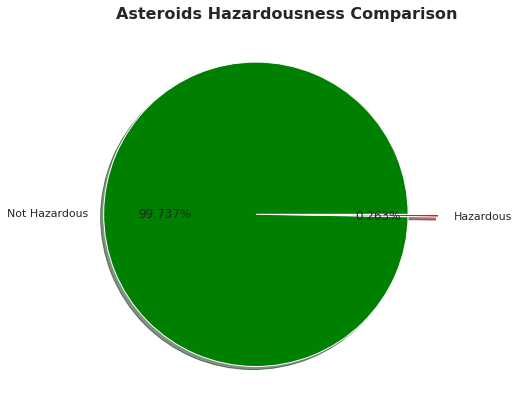

In [15]:
plt.figure(figsize = (7, 7))
labels = ['Not Hazardous', 'Hazardous']
numbers = [hazardous_or_not[0], hazardous_or_not[1]]
plt.pie(numbers, labels = labels, autopct = '%.3f%%', explode = [0.2, 0], shadow = True, colors = ['green', 'red'])
plt.title('Asteroids Hazardousness Comparison', fontsize = 16, fontweight = 'bold')
plt.show()

From simple pie chart above, we can see that our target variable is really unbalanced. This is quite reasonable since the probability of collision between Earth and an asteroid is extremely small. 

In [16]:
near_or_far = TRAIN['near_earth'].value_counts()
near_or_far

N    39018
Y      982
Name: near_earth, dtype: int64

In [17]:
near_percentage = round(near_or_far[1] * 100 / len(TRAIN['near_earth']), 2)
print(f'There are {near_percentage}% asteroids that are near to Earth.')
print(f'There are {100 - near_percentage}% that are near to Earth.')

There are 2.46% asteroids that are near to Earth.
There are 97.54% that are near to Earth.


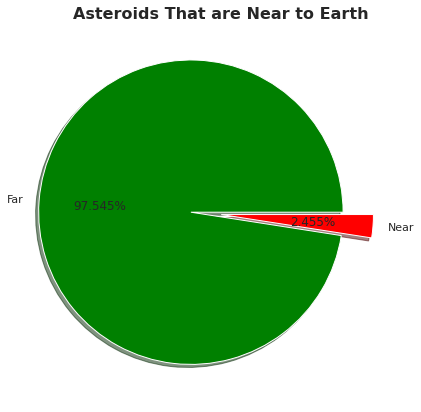

In [18]:
plt.figure(figsize = (7, 7))
labels = ['Far', 'Near']
numbers = [near_or_far[0], near_or_far[1]]
plt.pie(numbers, labels = labels, autopct = '%.3f%%', explode = [0.2, 0], shadow = True, colors = ['green', 'red'])
plt.title('Asteroids That are Near to Earth', fontsize = 16, fontweight = 'bold')
plt.show()

# Distributions of Numerical Variables

We can visualize the distributions of numerical variables to see whether some variables are normally distributed.

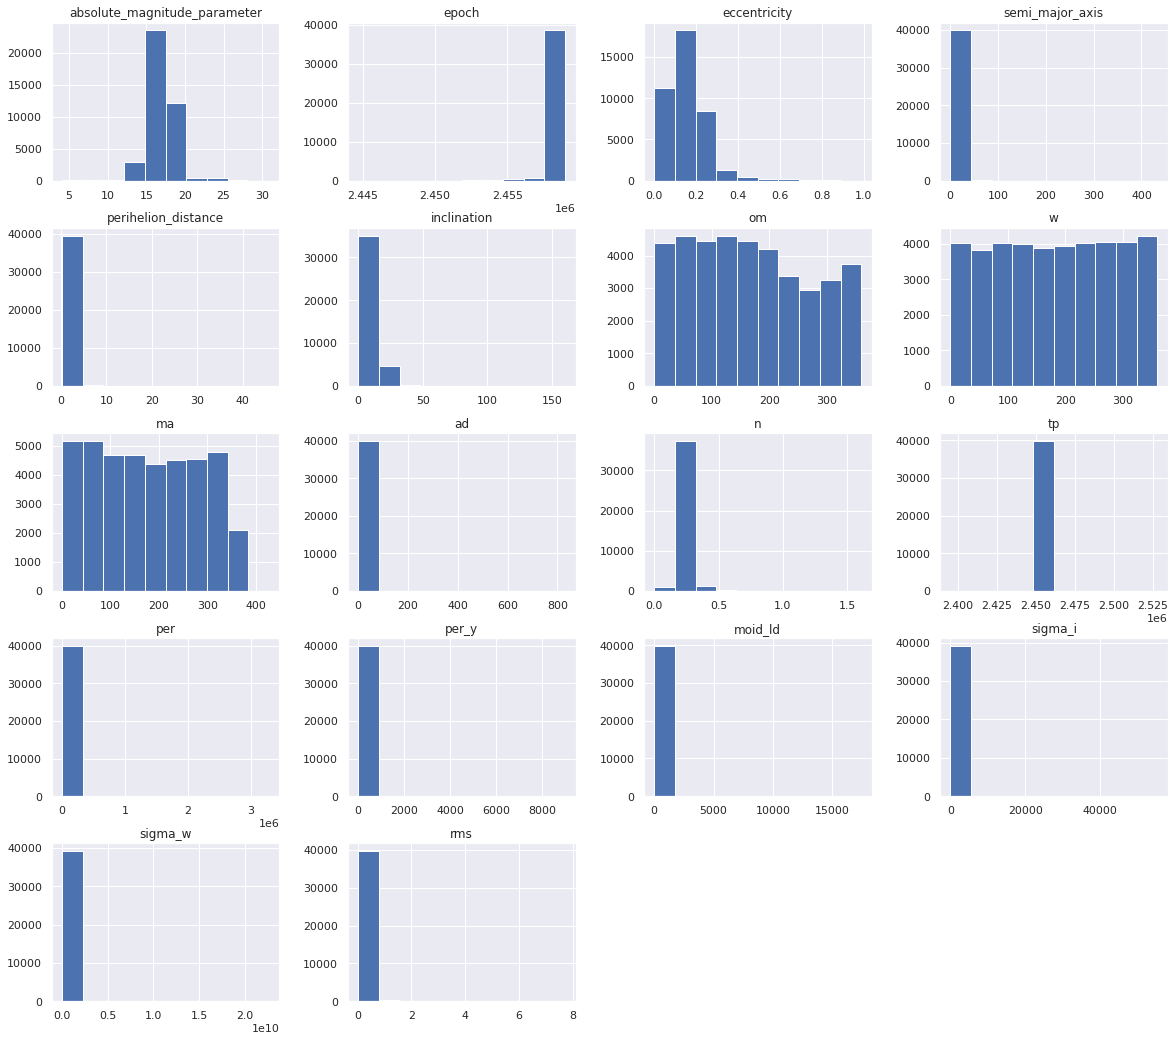

In [19]:
_ = TRAIN.hist(figsize = (20, 18))
plt.show()

We can interpret that almost all numerical variables don't follow the normal distributed. However, the **absolute_magnitude_parameter** column seems to look like a bell curve.

# Absolute Magnitude Parameter

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


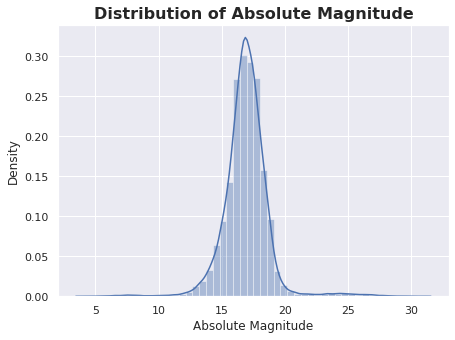

In [20]:
plt.figure(figsize = (7, 5))
sns.distplot(x = TRAIN['absolute_magnitude_parameter'], kde = True)
plt.title('Distribution of Absolute Magnitude', fontsize = 16, fontweight = 'bold')
plt.xlabel('Absolute Magnitude')
plt.show()

From the visualization above, we can see that the Absolute Magnitude of the asteroids distribution follows a normal distribution. This is also proven by the fact that the mean and median of Absolute Magnitude are so close to each other.

In [21]:
print('Mean: ' + str(TRAIN['absolute_magnitude_parameter'].mean()))
print('Median: ' + str(TRAIN['absolute_magnitude_parameter'].median()))

Mean: 16.909846003472015
Median: 16.9


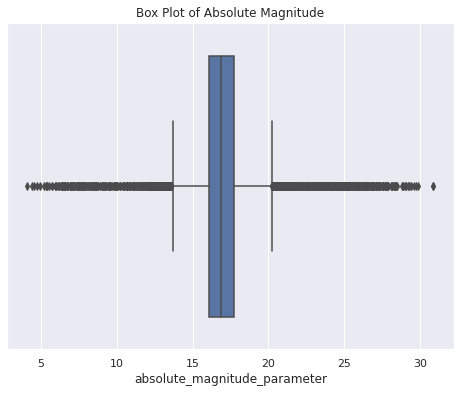

In [22]:
plt.figure(figsize = (8, 6))
sns.boxplot(x = TRAIN['absolute_magnitude_parameter'])
plt.title('Box Plot of Absolute Magnitude')
plt.show()

/opt/conda/lib/python3.7/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


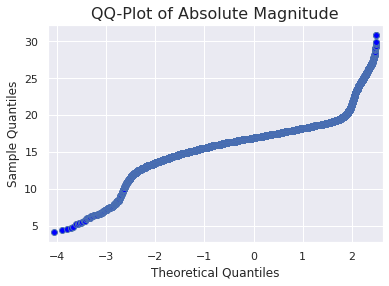

In [23]:
sm.qqplot(TRAIN['absolute_magnitude_parameter'])
pylab.title('QQ-Plot of Absolute Magnitude', fontsize = 16)
pylab.show()

The QQ Plot (Quantile Quantile Plot) above shows that most of the data points are quite close to 45 degree angle line. Thus, it is close to normal distribution.

However, besides doing univariate analysis, we need to check the relationship of Absoulute Magnitude with the target column (potentially_hazardous). Let's see the relationship in the visualization below.

In [24]:
TRAIN['potentially_hazardous']

0        N
1        N
2        N
3        N
4        N
        ..
39995    N
39996    N
39997    N
39998    N
39999    N
Name: potentially_hazardous, Length: 40000, dtype: object

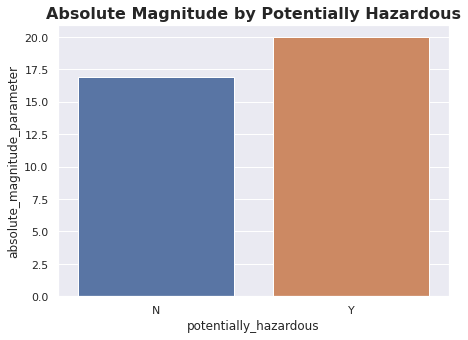

In [25]:
plt.figure(figsize = (7, 5))
# fig, ax = plt.subplots(figsize = (7, 5))

sns.barplot(x = 'potentially_hazardous', y = 'absolute_magnitude_parameter', data = TRAIN, ci = None)
plt.title('Absolute Magnitude by Potentially Hazardous', fontsize = 16, fontweight = 'bold')
plt.show()

The bar chart shows that apparently the absolute magnitude does not really depend on the hazardous of asteroids since the values are quite close. 

# Perihelion Distance vs. Eccentricity

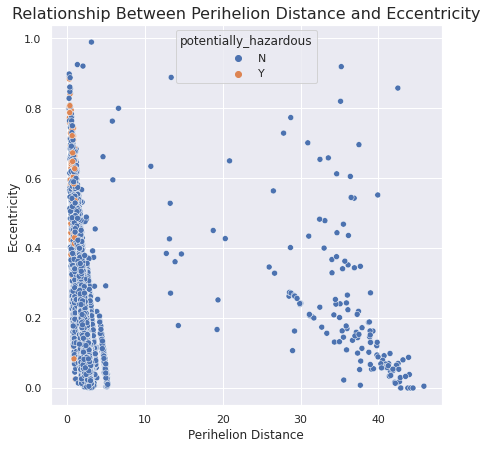

In [26]:
plt.figure(figsize = (7, 7))
sns.scatterplot(x = 'perihelion_distance', y = 'eccentricity', data = TRAIN, hue = 'potentially_hazardous')
plt.title('Relationship Between Perihelion Distance and Eccentricity', fontsize = 16)
plt.xlabel('Perihelion Distance')
plt.ylabel('Eccentricity')
plt.show()

# Perihelion Distance vs. Potentially Hazardous

I assume that perihelion distance (the closest distance to Earth) of an asteroid may affect the potential hazardousness. This is logically right because the asteroids that are farther from the Earth may have less possibility to be harmful to Earth. So we can compare the perihelion distance with our target variable in a bar chart to see if there is any relationship. The perihelion distance uses the Astronomical Unit (AU) where:

1 AU = Distance Between Earth and The Sun (around 150 million kilometers) 

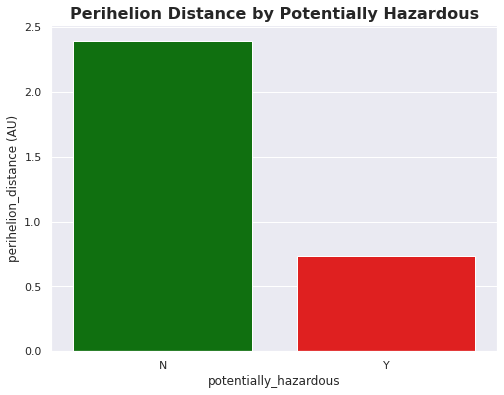

In [27]:
plt.figure(figsize = (8, 6))
sns.barplot(x = 'potentially_hazardous', y = 'perihelion_distance', data = TRAIN, ci = None, palette = ['green', 'red'])
plt.title('Perihelion Distance by Potentially Hazardous', fontsize = 16, fontweight = 'bold')
plt.ylabel('perihelion_distance (AU)')
plt.show()

The bar plot above clearly shows that most asteroids which perihelion distance are far away from the Earth, are not potentially hazardous to the Earth. On the contrary, most asteroids that are quite close to Earth (below 1 AU) can potentially be harmful to the Earth.

# Number of Unique Values in Class Column

In [28]:
list(TRAIN['class'].unique())

['MCA', 'MBA', 'OMB', 'IMB', 'TJN', 'AMO', 'APO', 'TNO', 'ATE', 'CEN', 'AST']

In [29]:
n = TRAIN['class'].nunique()
print(f'There are {n} class in thE dataset.')

There are 11 class in thE dataset.


# Class Column vs Potential Hazardous (Target Column)

We want to see the relationship of two categorical variables. So we must use another approach, like Cramer's V method. The result of Cramer's V method is a value ranging from 0 to 1. 1 means highest correlation and 0 indicates no correlation at all.

But first we can examine the "confusion matrix" that takes the two variables as follows.

In [30]:
confusion_matrix = pd.crosstab(TRAIN['class'], TRAIN['potentially_hazardous'])
confusion_matrix

potentially_hazardous,N,Y
class,,
AMO,344,6
APO,473,86
AST,4,0
ATE,62,11
CEN,17,0
IMB,764,0
MBA,34982,0
MCA,783,0
OMB,1154,0


From the table above, we can know that asteroids class is MBA and not hazardous are the most asteroids found. Now, we check the relationship between both variables using Cramer's V.

In [31]:
# function to conduct Cramer's V test
def cramers_v (var_1, var_2):
    confusion_matrix = pd.crosstab(var_1, var_2)
    chi_squared = scipy.stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi_squared / n
    row, col = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((row - 1) * (col - 1)) / (n - 1))
    row_corr = row - ((row - 1) ** 2) / (n - 1)
    col_corr = col - ((col - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((col_corr - 1), (row_corr - 1)))

cramers_v(TRAIN['class'], TRAIN['potentially_hazardous'])

0.3782081524800791

The Cramer's V result shows the value of around 0.38, which shows that there is a just fair correlation between asteroids class and hazardousness.

# Visualizing Asteroids by Class

In [32]:
asteroids_by_class = TRAIN.groupby('class')['eccentricity'].count().reset_index()
asteroids_by_class = asteroids_by_class.sort_values('eccentricity', ascending = False).reset_index().drop('index', axis = 1)
asteroids_by_class.rename(columns = {'eccentricity': 'number_of_asteroids'}, inplace = True)
asteroids_by_class

,class,number_of_asteroids
0,MBA,35742
1,OMB,1181
2,MCA,791
3,IMB,789
4,APO,559
5,TJN,355
6,AMO,350
7,TNO,139
8,ATE,73
9,CEN,17


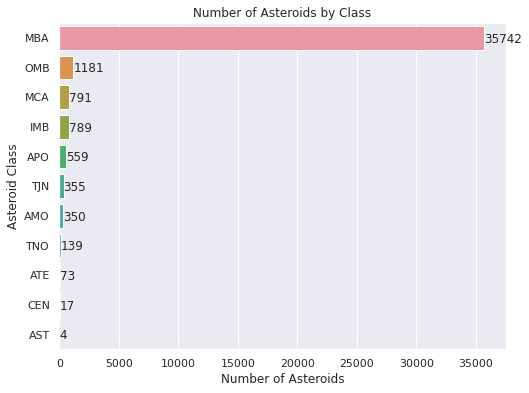

In [33]:
fig, ax = plt.subplots(figsize = (8, 6))
plot = sns.barplot(x = 'number_of_asteroids', y = 'class', data = asteroids_by_class)
ax.set_title('Number of Asteroids by Class')
ax.set_xlabel('Number of Asteroids')
ax.set_ylabel('Asteroid Class')

for p in plot.patches:
    width = p.get_width()
    plt.text(5 + width, p.get_y() + 0.55 * p.get_height(),
             '{:1.0f}'.format(width), ha = 'left', va = 'center')
    
plt.show()

From the bar chart above, we can see that the MBA class asteroids are the most common astreoids found in the dataset.

# Examine Missing Values

In [34]:
missing_values = TRAIN.isnull().sum()
missing_values[missing_values > 0].sort_values(ascending = False)

potentially_hazardous           821
sigma_i                         821
sigma_w                         821
absolute_magnitude_parameter    253
moid_ld                           4
dtype: int64

In [35]:
missing_values_columns = len(missing_values[missing_values > 0])
percentage = round(missing_values_columns * 100 / len(TRAIN.columns), 2)
print(f'Columns that have missing values: {missing_values_columns} ({percentage}%)')

Columns that have missing values: 5 (23.81%)


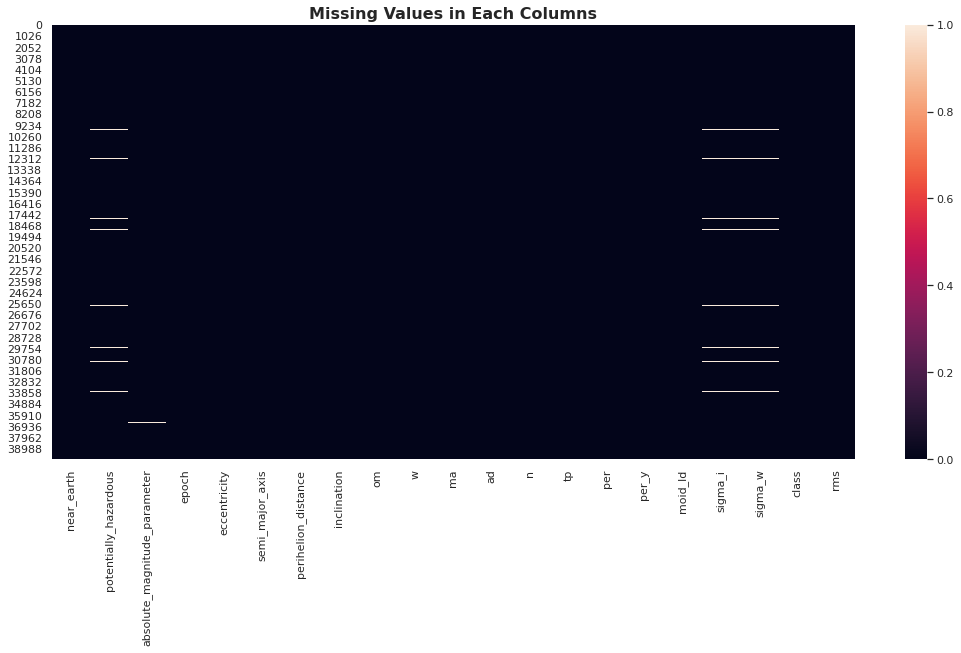

In [36]:
plt.figure(figsize = (18, 8))
sns.heatmap(TRAIN.isnull())
plt.title('Missing Values in Each Columns', fontsize = 16, fontweight = 'bold')
plt.show()

# Save Train and Test Data to CSV

In the next step, data preprocessing, we will take a closer look for missing values and make sure that we fill all of them. So we need to export and keep track of our current TRAIN and TEST dataset.

In [37]:
TRAIN.to_csv('TRAIN.csv', index = False)
TEST.to_csv('TEST.csv', index = False)